In [ ]:
# mount drive to use your drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read the folder to download your input file
!cd '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/input'

In [ ]:
# mention the link to download the training dataset
!gdown --id "12_WTFi9ppvD-loaWUWpUar25Z3nT5k9P"

Downloading...
From: https://drive.google.com/uc?id=12_WTFi9ppvD-loaWUWpUar25Z3nT5k9P
To: /content/trainset.zip
448MB [00:06, 65.2MB/s]


In [ ]:
# unzip training dataset
!unzip '/content/drive/MyDrive/Colab Notebooks/DLCV/input/trainset.zip'

Streaming output truncated to the last 5000 lines.
   creating: trainset/0006/0006_0000575/
  inflating: trainset/0006/0006_0000575/0000005.jpg  
  inflating: trainset/0006/0006_0000575/0006_0000575_script.jpg  
   creating: trainset/0006/0006_0000576/
  inflating: trainset/0006/0006_0000576/0000005.jpg  
  inflating: trainset/0006/0006_0000576/0000007.jpg  
  inflating: trainset/0006/0006_0000576/0006_0000576_script.jpg  
  inflating: trainset/0006/0006_0000576/0006_0000576_script_2.jpg  
   creating: trainset/0006/0006_0000577/
  inflating: trainset/0006/0006_0000577/0000001.jpg  
  inflating: trainset/0006/0006_0000577/0000011.jpg  
  inflating: trainset/0006/0006_0000577/0006_0000577_script.jpg  
   creating: trainset/0006/0006_0000580/
  inflating: trainset/0006/0006_0000580/0000004.jpg  
  inflating: trainset/0006/0006_0000580/0006_0000580_script.jpg  
   creating: trainset/0006/0006_0000582/
  inflating: trainset/0006/0006_0000582/0000001.jpg  
  inflating: trainset/0006/0006_00


Importing Libraries



In [1]:
import tensorflow as tf 
import numpy as np
import os
from keras.layers import Conv2D, Activation, AveragePooling2D, MaxPooling2D, ZeroPadding2D, Input, concatenate
from keras.layers.core import Lambda, Dense, Flatten
from numpy import genfromtxt
import cv2
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers import *
from keras.models import Model
from sklearn.preprocessing import normalize
K.set_image_data_format('channels_first')
import random
import matplotlib.pyplot as plt
import keras
from keras.utils import plot_model
import sys

Defining the path of dataset and haar cascade

In [2]:

# path to the dataset folder
PATH = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/input/trainset"
# path for harcasecade file
path_haar = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/input/haarcascade_frontalface_default.xml'

Analysing the dataset

In [3]:
# script image
reference_images=[]   
# selfie image
selfies=[]


n_sub=0


In [5]:
# count the number of files

for folder in os.listdir(PATH):
    subfolder=os.path.join(PATH,folder)
    # number of folders
    for sub in os.listdir(subfolder):

        # find number of employee
        n_sub=n_sub+1
        img_dir=os.path.join(subfolder,sub)
        for img_raw in os.listdir(img_dir):
            # find number of script
            if 'script' in img_raw:
                reference_images.append(img_raw)
            else :
                # find number of selfies
                selfies.append(img_raw)

In [6]:
print("The total number of Folders in dataset : ",len(os.listdir(PATH)))
print("The total number of Employee in dataset : ",n_sub)
print("The total number of selfies are : ",len(selfies))
print("The total number of script images are : ",len(reference_images))

The total number of Folders in dataset :  12
The total number of Employee in dataset :  2024
The total number of selfies are :  6396
The total number of script images are :  2442


In [ ]:
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/DLCV/input/trainset/0001/0001_0000255/0000005.jpg')

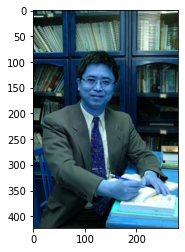

In [ ]:
plt.imshow(image1)
plt.show()

In [ ]:
image2=cv2.imread('/content/drive/MyDrive/Colab Notebooks/DLCV/input/trainset/0001/0001_0000255/0001_0000255_script.jpg')

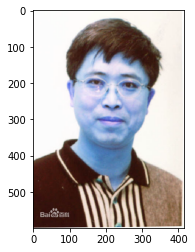

In [ ]:
plt.imshow(image2)
plt.show()




Defining the Model




In [12]:
def inception_block_1a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_3a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(128,(3,3),data_format='channels_first',name='inception_3a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(16,(1,1),data_format='channels_first',name='inception_3a_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(32,(5,5),data_format='channels_first',name='inception_3a_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_pool = MaxPooling2D(pool_size=3, strides=2, data_format='channels_first')(X)
    X_pool = Conv2D(32, (1, 1), data_format='channels_first', name='inception_3a_pool_conv')(X_pool)
    X_pool = BatchNormalization(axis=1, epsilon=0.00001, name='inception_3a_pool_bn')(X_pool)
    X_pool = Activation('relu')(X_pool)
    X_pool = ZeroPadding2D(padding=((3, 4), (3, 4)), data_format='channels_first')(X_pool)
    
    X_1=Conv2D(64,(1,1),data_format='channels_first',name='inception_3a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_pool,X_1],axis=1)
    return inception

def inception_block_1b(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_3b_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(128,(3,3),data_format='channels_first',name='inception_3b_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_3b_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),data_format='channels_first',name='inception_3b_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(64,(1,1),data_format='channels_first',name='inception_3b_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(4,4),data_format='channels_first')(X_P)
    
    X_1=Conv2D(64,(1,1),data_format='channels_first',name='inception_3b_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_P,X_1],axis=1)
    return inception

def inception_block_1c(X):
    X_3=Conv2D(128,(1,1),data_format='channels_first',name='inception_3c_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(256,(3,3),strides=(2,2),data_format='channels_first',name='inception_3c_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_3c_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),strides=(2,2),data_format='channels_first',name='inception_3c_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=MaxPooling2D(pool_size=3,strides=2,data_format='channels_first')(X)
    X_P=ZeroPadding2D(padding=((0,1),(0,1)),data_format='channels_first')(X_P)
    

    inception=concatenate([X_3,X_5,X_P],axis=1)
    return inception

def inception_block_2a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_4a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(192,(3,3),data_format='channels_first',name='inception_4a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_4a_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),data_format='channels_first',name='inception_4a_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(128,(1,1),data_format='channels_first',name='inception_4a_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_4a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_P,X_1],axis=1)
    return inception

def inception_block_2b(X):
    X_3=Conv2D(160,(1,1),data_format='channels_first',name='inception_4e_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(256,(3,3),strides=(2,2),data_format='channels_first',name='inception_4e_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(64,(1,1),data_format='channels_first',name='inception_4e_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(128,(5,5),strides=(2,2),data_format='channels_first',name='inception_4e_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=MaxPooling2D(pool_size=3,strides=2,data_format='channels_first')(X)
    X_P=ZeroPadding2D(padding=((0,1),(0,1)),data_format='channels_first')(X_P)

    inception=concatenate([X_3,X_5,X_P],axis=1)
    return inception

def inception_block_3a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_5a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(384,(3,3),data_format='channels_first',name='inception_5a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)

    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(96,(1,1),data_format='channels_first',name='inception_5a_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_5a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_P,X_1],axis=1)
    return inception
def inception_block_3b(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_5b_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(384,(3,3),data_format='channels_first',name='inception_5b_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    
    X_P=MaxPooling2D(pool_size=(3,3),strides=2,data_format='channels_first')(X)
    X_P=Conv2D(96,(1,1),data_format='channels_first',name='inception_5b_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_5b_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_P,X_1],axis=1)
    return inception


def FinalModel(input_shape):
    
    X_input=Input(input_shape)
    
    X=ZeroPadding2D(padding=(3,3))(X_input)
    X=Conv2D(64,(7,7),strides=(2,2),name='conv1')(X)
    X=BatchNormalization(axis=1,name='bn1')(X)
    X=Activation('relu')(X)
    
    X=ZeroPadding2D((1,1))(X)
    X=MaxPooling2D((3,3),strides=2)(X)
    
    X=Conv2D(64,(1,1),strides=(1,1),name='conv2')(X)
    X=BatchNormalization(axis=1,epsilon=0.00001,name='bn2')(X)
    X=Activation('relu')(X) 
    
    X=ZeroPadding2D(padding=(1,1))(X)
    
    X=Conv2D(192,(3,3),strides=(1,1),name='conv3')(X)
    X=BatchNormalization(axis=1,epsilon=0.00001,name='bn3')(X)
    X=Activation('relu')(X)
    
    X=ZeroPadding2D(padding=(1,1))(X)
    X=MaxPooling2D(pool_size=(3,3),strides=(2,2))(X)
    
    X=inception_block_1a(X)
    X=inception_block_1b(X)
    X=inception_block_1c(X)
    
    X=inception_block_2a(X)
    X=inception_block_2b(X)
    
    X=inception_block_3a(X)
    X=inception_block_3b(X)
    
    X=AveragePooling2D(pool_size=(3,3),strides=(1,1),data_format='channels_first')(X)
    X=Flatten()(X)
    X=Dense(128,activation='relu',kernel_initializer='glorot_normal',name='dense_layer')(X)
    X=Lambda(lambda x:K.l2_normalize(x,axis=1),name='lambda_1')(X)
    
    model=Model(inputs=X_input,outputs=X,name='FaceRecognotionModel')
    return model    

In [13]:
model=FinalModel(input_shape=(3,96,96))

In [14]:
model.summary()

Model: "FaceRecognotionModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 3, 102, 102)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 48, 48)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 64, 48, 48)   256         conv1[0][0]                      
_______________________________________________________________________________

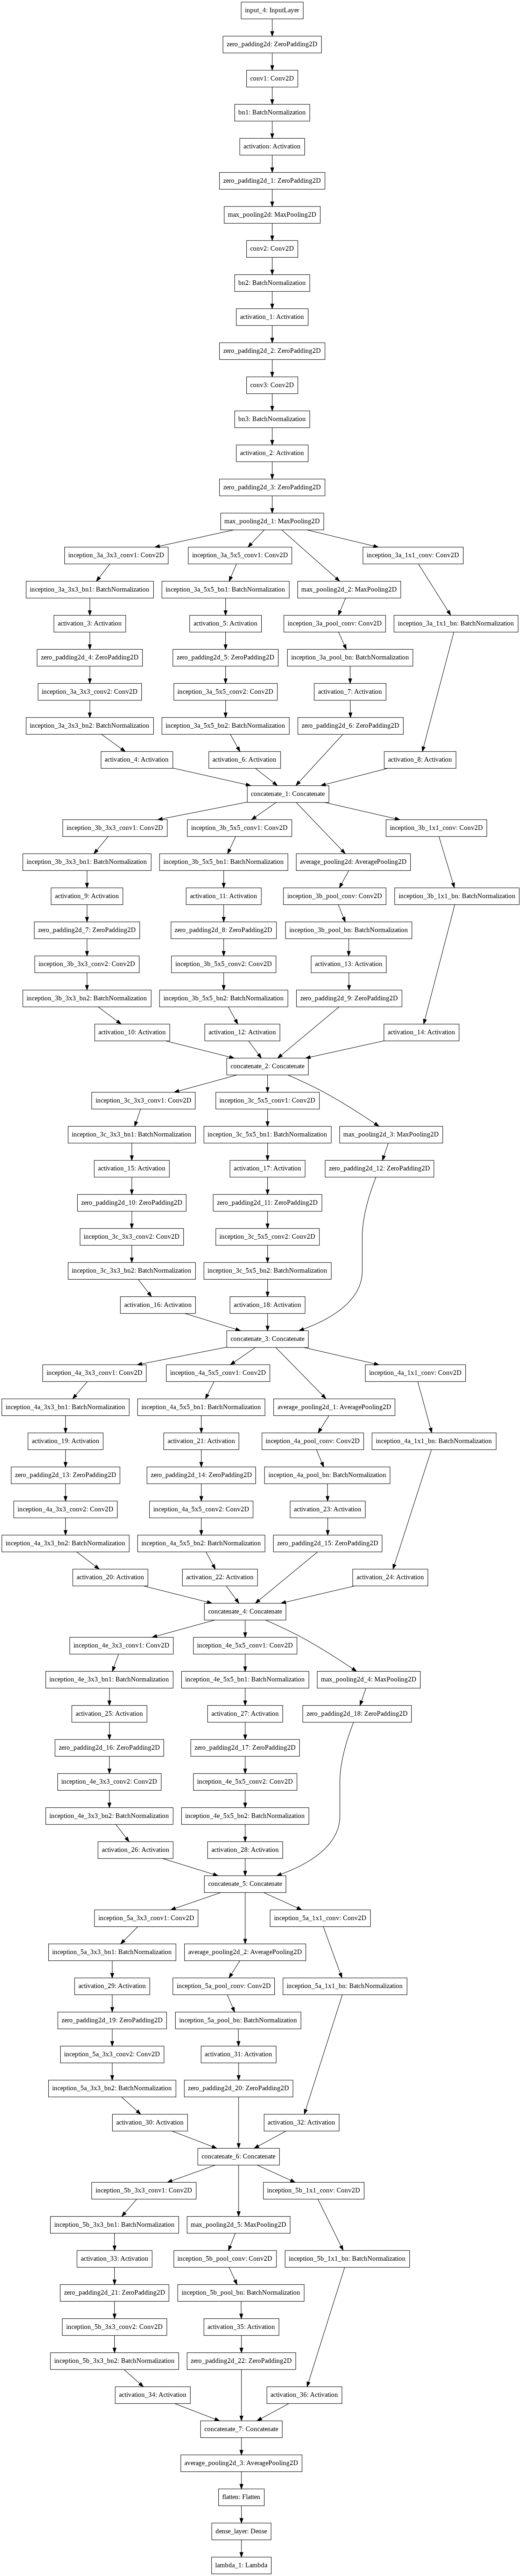

In [15]:

plot_model(model,to_file='/content/drive/MyDrive/Colab Notebooks/DLCV/output/Inception_one_shot.png')





Defining the Triplet Loss Function




In [16]:
def triplet_loss_t(y_true,y_pred):
    #print(y_pred)
    anchor=y_pred[:,0:128]
    pos=y_pred[:,128:256]
    neg=y_pred[:,256:384]
    
    positive_distance = K.sum(K.abs(anchor-pos), axis=1)
    negative_distance = K.sum(K.abs(anchor-neg), axis=1)
    probs=K.softmax([positive_distance,negative_distance],axis=0)
    #loss = positive_distance - negative_distance+alpha
    loss=K.mean(K.abs(probs[0])+K.abs(1.0-probs[1]))
    return loss

Function       to      resize       the   image    to match   the   input   shape of the model


In [17]:
def localize_resize(path_image,path_haar):
    image=cv2.imread(path_image)
    
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    classifier=cv2.CascadeClassifier(path_haar)
    faces=classifier.detectMultiScale(gray,1.1,6)
    if len(faces) != 1:#condition if we dont have any faces or cant be detected y haar cascade we will skip those
        return -1
    
    x,y,w,h=faces.squeeze()
    crop=image[y:y+h,x:x+w]
    image=cv2.resize(crop,(96,96))
    image=np.transpose(image,(2,0,1))
    image=image.astype('float32')/255.0
    return image

Definig the generator

In [18]:
def data_gen(batch_size=32):
    while True:
        i=0
        positive=[]
        anchor=[]
        negative=[]    
        

        while(i<batch_size):
            r=random.choice(os.listdir(PATH))
            p=PATH+'/'+ r
            id=os.listdir(p)
            ra=random.sample(id,2)
            pos_dir=p+'/'+ra[0]
            neg_dir=p+'/'+ra[1]
            pos=pos_dir+'/'+random.choice(os.listdir(pos_dir))
            anc=pos_dir+'/'+random.choice([x for x in os.listdir(pos_dir) if 'script' in x])
            neg=neg_dir+'/'+random.choice(os.listdir(neg_dir))
            pos_img=localize_resize(pos,path_haar)
                    #print(pos+anc+neg)
            if pos_img is -1:
                continue
            neg_img=localize_resize(neg,path_haar)
            if neg_img is -1:
                continue
            anc_img=localize_resize(anc,path_haar)
            if anc_img is -1:
                continue
            positive.append(list(pos_img))
                #print('positive{0}'.format(i))
            negative.append(list(neg_img))
                #print('negative{0}'.format(i))
            anchor.append(list(anc_img))
                #print('anchor{0}'.format(i))
            i=i+1
        #return anchor,positive,negative
        yield ([np.array(anchor),np.array(positive),np.array(negative)],np.zeros((batch_size,1)).astype("float32"))

Defining model for triplet loss

In [19]:
triplet_model_a=Input((3,96,96))
triplet_model_n=Input((3,96,96))
triplet_model_p=Input((3,96,96))
triplet_model_out=Concatenate()([model(triplet_model_a),model(triplet_model_p),model(triplet_model_n)])
triplet_model=Model([triplet_model_a,triplet_model_p,triplet_model_n],triplet_model_out)

In [20]:


triplet_model.compile(optimizer='adam',loss=triplet_loss_t)



In [21]:
triplet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
FaceRecognotionModel (Functiona (None, 128)          3743280     input_5[0][0]                    
                                                                 input_7[0][0]                

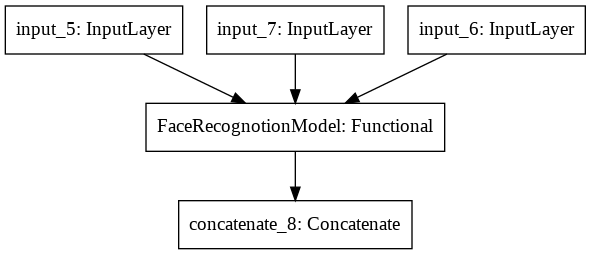

In [22]:
plot_model(triplet_model,to_file='/content/drive/MyDrive/Colab Notebooks/DLCV/output/triplet_model.png')


Training the model



In [ ]:
# We will be training the model for 5 epoch and with steps_per_epoch as 100 .These hyperparameters can be changed as per the availablity of computional power
# Since batch size is 32 and total number of samples is almost 3200 so steps_per_epoch=100

triplet_model.fit(data_gen(),steps_per_epoch=100,epochs=5)



Epoch 1/5
100/100 [==============================] - 2106s 21s/step - loss: 0.5245
Epoch 2/5
100/100 [==============================] - 2032s 20s/step - loss: 0.4066
Epoch 3/5
100/100 [==============================] - 2050s 20s/step - loss: 0.3638
Epoch 4/5
100/100 [==============================] - 2102s 21s/step - loss: 0.3445
Epoch 5/5
100/100 [==============================] - 2071s 21s/step - loss: 0.3096


In [ ]:
triplet_model.save('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/output/triplet_model.h5')


In [23]:

triplet_model=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/output/triplet_model.h5',custom_objects={'triplet_loss_t':triplet_loss_t})



Implementation of the model


Function to preprocess the image according to the model requirements.


It uses haar cascade to detect the face and crops the face to remove the unwanted noise from the image and then resize it to (96,96).

In [24]:
#To loacalize the face and resize the image
def image_resizing(image,path_haar):

    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    classifier=cv2.CascadeClassifier(path_haar)
    faces=classifier.detectMultiScale(gray,1.1,6)

    if len(faces)!=1:
        print('More than one Image in the selfie')
        sys.exit(0)
    x,y,w,h=faces.squeeze()
    crop=image[y:y+h,x:x+w]
    image=cv2.resize(crop,(96,96))

    return image

Function to convert the image to embeddings.

In [25]:
def encode_img(img1,triplet_model):
    #img1=cv2.imread(path,1)
    img=img1[...,::-1]
    img=np.around(np.transpose(img,(2,0,1))/255,decimals=12)
    x_train=np.array([img])
    emb=triplet_model.layers[3].predict_on_batch(x_train)
    return emb

Function to calculate the distance between the embeddings and confidence score

In [26]:
# Selecting the threshold value as 0.65 and intervals means that +/- 0.3 the model confidence score will be 100%.
threshold=0.65
interval=0.3
def confidence_value(ref_encode,img_encode,thres=threshold):
    #diff=np.max(img_encode-ref_encode)
    dist=np.linalg.norm((img_encode-ref_encode))
    #confidence=(1-K.eval(tf.minimum(dist,1)))
    confidence=(threshold-max([dist,interval]))/(threshold-interval)
    return dist,confidence

Testing

matching the script image to selfies


In [27]:
def predict_match(script,selfies):
  
  fig=plt.figure(figsize=(10,10))
  
  ax1 = fig.add_subplot(2,2,1)
  ax1.imshow(script)
  
  ax2 = fig.add_subplot(2,2,2)
  ax2.imshow(selfies)


  script_img=image_resizing(script,path_haar)

  selfies_img=image_resizing(selfies,path_haar)
  
  script_encode=encode_img(script_img,triplet_model)
  
  selfies_encode=encode_img(selfies_img,triplet_model)
  
  dist,conf=confidence_value(script_encode,selfies_encode)
  
  if dist<threshold:
      print("Match with a confidence of ",conf*100)
      #print("Distance ",dist)
  else:
      print("No Match with a confidence of ",abs(conf*100))

Match with a confidence of  77.20875569752285


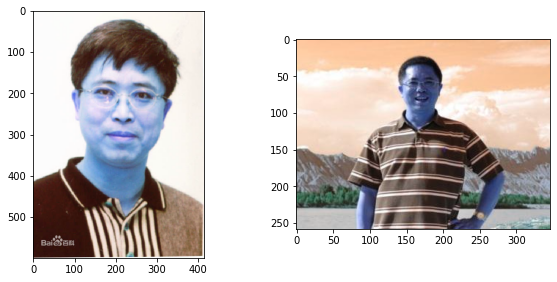

In [29]:
script_image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/input/trainset/0001/0001_0000255/0001_0000255_script.jpg')
selfies_image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_ComputerVision/input/trainset/0001/0001_0000255/0000001.jpg')


predict_match(script_image,selfies_image)